<div style="color:#8b1538; font-size:35px;">Benchmark of Dadi</div>

In [1]:
#import ast
#import json
#import os

import matplotlib.pyplot as plt
#import numpy as np
import pandas as pd
#import seaborn as sns

import sei.analysis.dadi as dadi
import sei.files.files as f
import sei.graphics.plot as plot
#import sei.simulation.msprime as ms
import sei.sei as sei

<br>

> Load data

In [2]:
# data_all = f.export_inference_files(model='decline', fold=False, param='all')

data_all = pd.read_json('./Data/Dadi/decline/all/dadi_decline-all_bu.zip')  # back-up data

In [3]:
french = False
lang="fr" if french else "en"  # set up lang for heatmap

<br>

# Plot some inferred SFS and the theoretical one

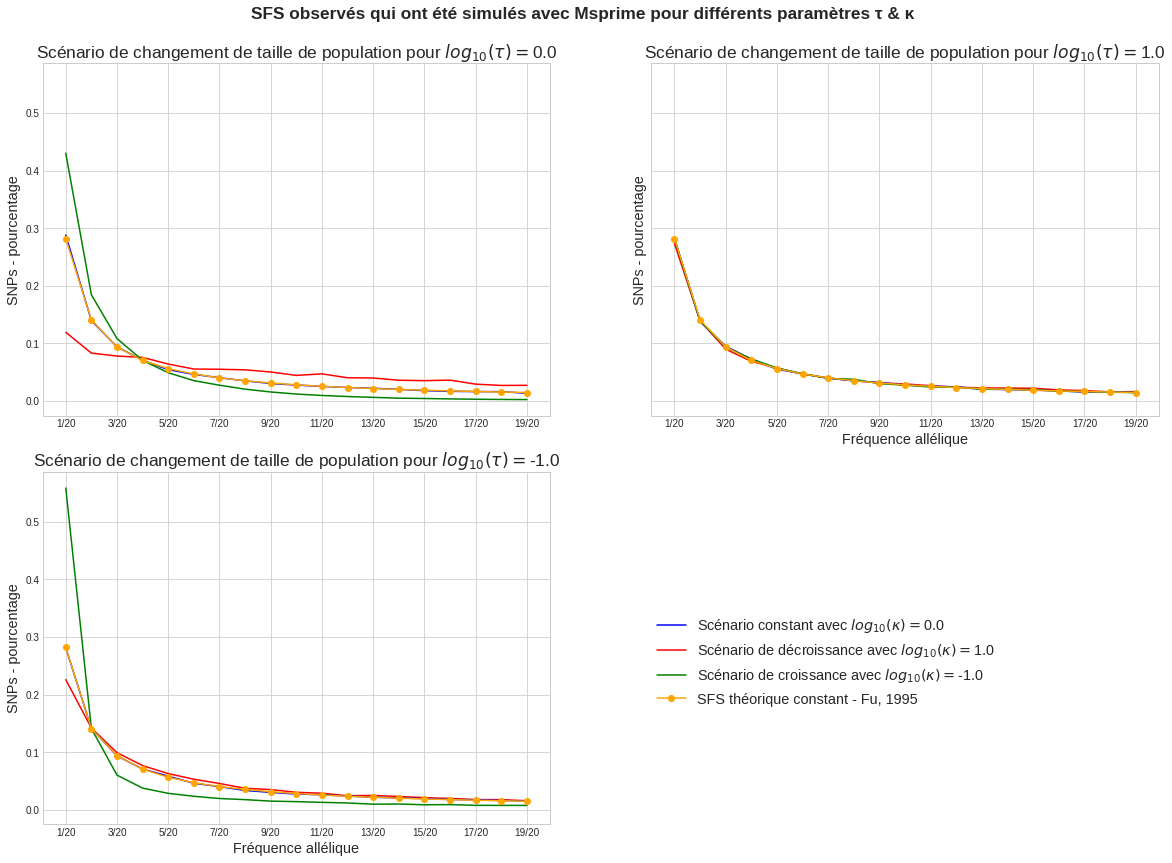

In [4]:
suptitle = "SFS observés qui ont été simulés avec Msprime pour différents paramètres τ & κ"

with plt.style.context('seaborn-whitegrid'):  # use seaborn style for plot
    plot.plot_all_sfs(data_all, suptitle, sfs='observed', filout="./Figures/Dadi/sfs_observed.png")

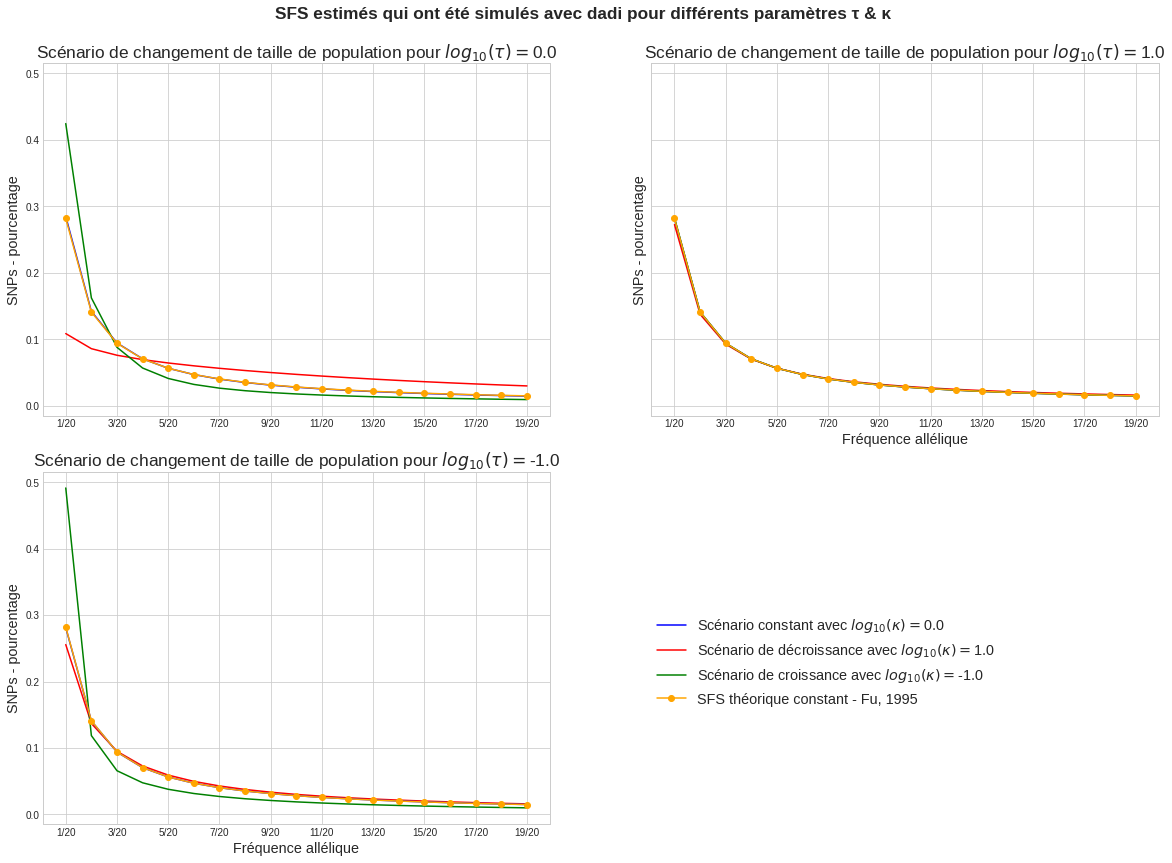

In [5]:
suptitle = "SFS estimés qui ont été simulés avec dadi pour différents paramètres τ & κ"

with plt.style.context('seaborn-whitegrid'):  # use seaborn style for plot
    plot.plot_all_sfs(data_all, suptitle, sfs='inferred', filout="./Figures/Dadi/sfs_observed.png")

<br>

# Analysis

<div style="color: #8b1538; font-size: 28px">1. Weighted square distance</div><br>

The weighted square distance $\large{d^2}$ is:

1. Between the observed SFS $\large{\eta^{obs}}$ and the predicted SFS by model M1 $\large{\eta^{model}}$ [1]

\begin{equation}
\Large{ d^2(\eta^{model}, \eta^{obs}) = \sum_{i=1}^{n}{\frac{(\eta^{model}_i - \eta^{obs}_i)^2}{\eta^{model}_i }} }
\end{equation}

2. Between the inferred SFS of two models ($\large{\eta^{m2}}$ & $\large{\eta^{m1}}$)

\begin{equation}
\Large{ d^2(\eta^{m0}, \eta^{m1}) = \sum_{i=1}^{n}{\frac{(\eta^{m0}_i - \eta^{m1}_i)^2}{ (\eta^{m0}_i + \eta^{m1}_i) / 2 }} }
\end{equation}

Start the sum from 2 to ignore singletion (i=2).

3. Between the theoretical SFS and the observed ones

\begin{equation}
\Large{ d^2(theorique, observe) = \frac{(theorique - observe)^2}{theorique} }
\end{equation}


<br>

<div style="color: #8b1538; font-size: 15px;">[1] Each SFS must be normalized for comparison</div>

> Compute weighted square distance between theoritical SFS of any constant population & observed SFS (msprime)

Permet  de déterminer pour quel paramètre (Tau, Kappa) les SFS observés sont différenciés du SFS théorique de n'importe quelle population constante, i.e. déterminer quand les SFS permettent de repérer un changement de taille de population.

<br>

<div style="color: #8b1538; font-size: 32px">2. Log-likelihood ratio test</div><br>

Likelihood ratio test lrt assess the godness fit of two model. It's allow you to test wheter adding parameters to models significantly increase the likelihood the model.

1. Likelihood ratio test

\begin{equation}
\large{ lrt = -2*\frac{L0}{L1} }
\end{equation}

with L0 the likelihood of m0 and L1 the likelihood of m1 <br>

2. Log-likelihood ratio test

\begin{equation}
\large{ log(lrt) = 2 * (log_{10}L1 - log_{10}L0) }
\end{equation}

with $log_{10}L0$ the log-likelihood of m0 and $log_{10}L1$ the log-likelihood of m1

<br>

**Models**

* M0 a n0-parameter model - the model with less parameters

* M1 a n1-parameter model - the model with more parameters

with n0 < n1 (number of parameters)

<br>

**Hypothesis**

* H0 the null hypothesis - adding the parameter(s) does not significantly increase the likelihood of the model

* H1 the alternative hypothesis - adding the parameter(s) significantly increase the likelihood of the model

<br>

**Decision rule**

* If p-value >= $\alpha$ then the test is insignificant and do not reject of H0

* If p-value < $\alpha$ then the test is significant and reject of H0

with $\alpha = 0.05$

<br>

**Degrees of freedom**

The difference in the number of parameters between M0 and M1, i.e. n1 - n0

<br>

<div style="color: #8b1538; font-size: 28px;">Vérification des paramètres estimés par Dadi</div>

Check infered parameters by Dadi.

<br>

# Sudden decline & growth model for each pair (Tau, Kappa) 

<div style="font-size: 18px; font-weight: bold">Weighted square distance - observed SFS and theoritical SFS of any constant population</div></br>

Distance between the observed SFS (generated with msprime) and the constant theoretical SFS (Fu, 1995).

In [5]:
data_all['d2 observed theoretical'] = pd.Series(sei.compute_weighted_square_distance(data_all))

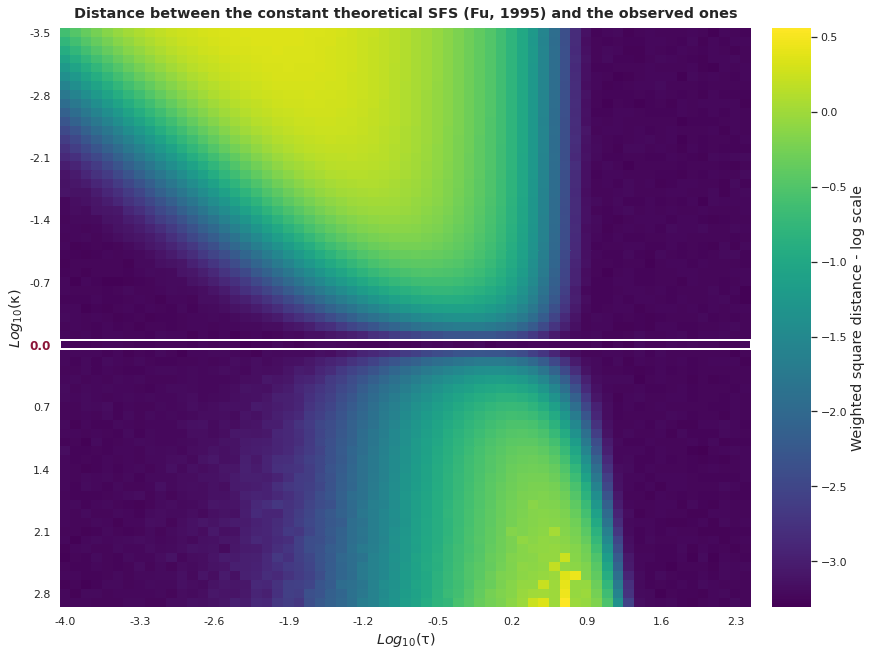

In [6]:
if lang == 'fr':
    title = "Distance au carré entre le SFS théorique constant (Fu, 1995) et ceux observés"
    cbar = "Distance au carré en échelle logarithmique"
else:
    title = "Distance between the constant theoretical SFS (Fu, 1995) and the observed ones"
    cbar = "Weighted square distance - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="d2 observed theoretical"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_distance(theoretical-observed).png"
)

<br>

> Cas migration

In [18]:
data_migration = pd.read_json("./Data/Msprime/migration/migration-all.zip")
data_migration['d2 observed theoretical'] = pd.Series(sei.compute_weighted_square_distance(data_migration))

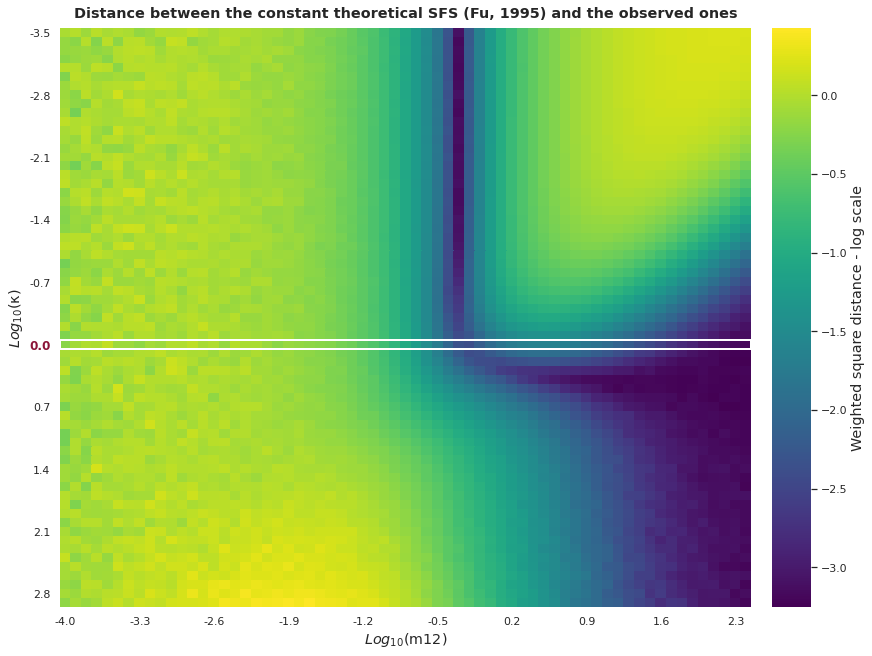

In [34]:
if lang == 'fr':
    title = "Distance au carré entre le SFS théorique constant (Fu, 1995) et ceux observés"
    cbar = "Distance au carré en échelle logarithmique"
else:
    title = "Distance between the constant theoretical SFS (Fu, 1995) and the observed ones"
    cbar = "Weighted square distance - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_migration, value="d2 observed theoretical")[['m12', 'Kappa', 'd2 observed theoretical']], title=title, cbar=cbar
)

<br>

<div style="font-size: 18px; font-weight: bold">Weighted square distance - observed SFS (generated with msprime) and inferred ones under M1</div></br>

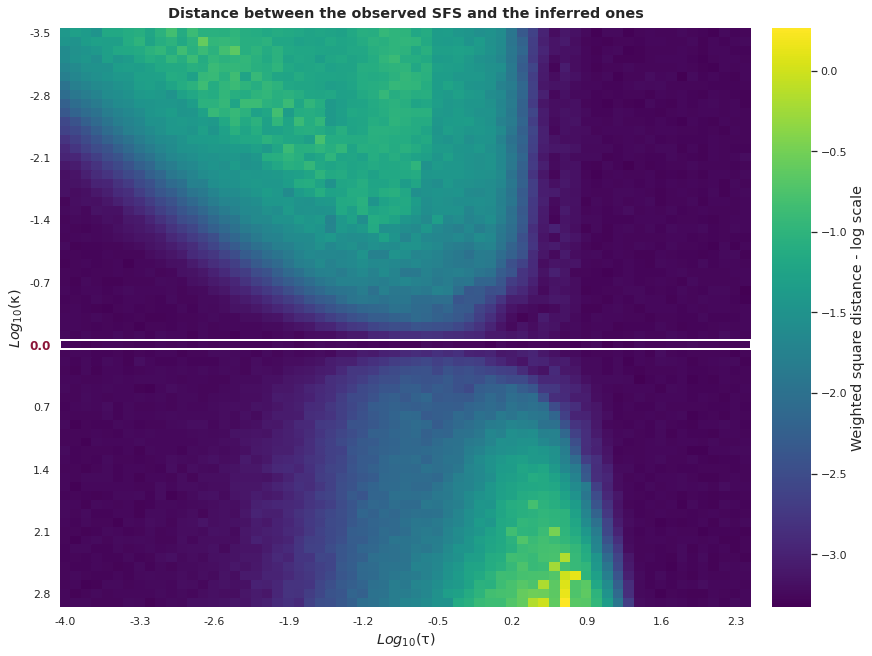

In [10]:
if lang == 'fr':
    title = "Distance au carré entre les SFS observés et ceux inférés avec Dadi"
    cbar = "Distance au carré en échelle logarithmique"
else:
    title = "Distance between the observed SFS and the inferred ones"
    cbar = "Weighted square distance - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="d2 observed inferred"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_distance(observed-inferred).png"
)

<div style="font-size: 18px; font-weight: bold">Weighted square distance - inferred SFS under M0 & inferred SFS under M1</div></br>

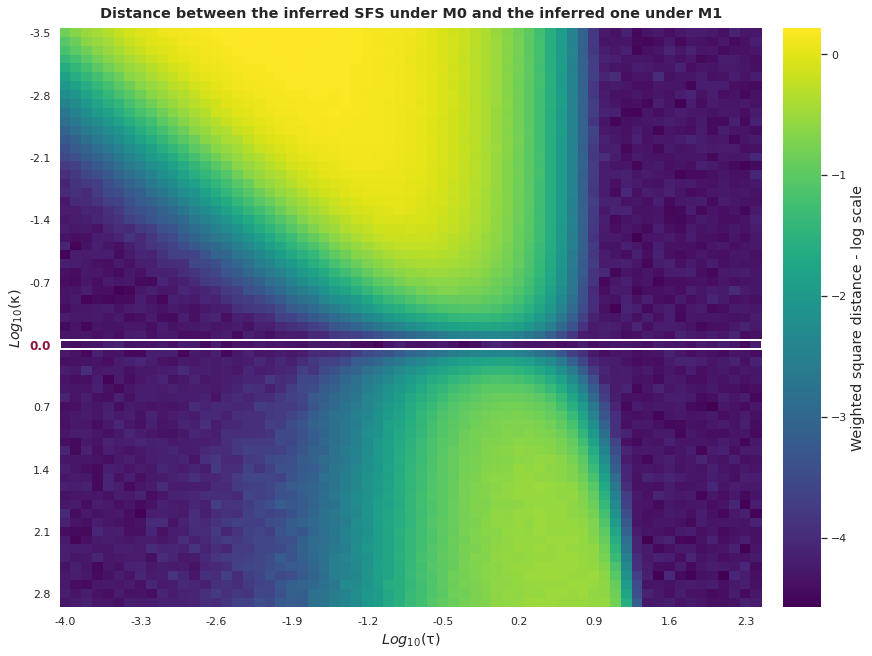

In [11]:
if lang == 'fr':
    title = "Distance au carré entre les SFS inférés sous M0 et ceux inférés sous M1"
    cbar = "Distance au carré en échelle logarithmique"
else:
    title = "Distance between the inferred SFS under M0 and the inferred one under M1"
    cbar = "Weighted square distance - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="d2 models"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_distance(M0-M1).png"
)

<br>

<div style="font-size: 18px; font-weight: bold">Log-likelihood ratio test</div></br>

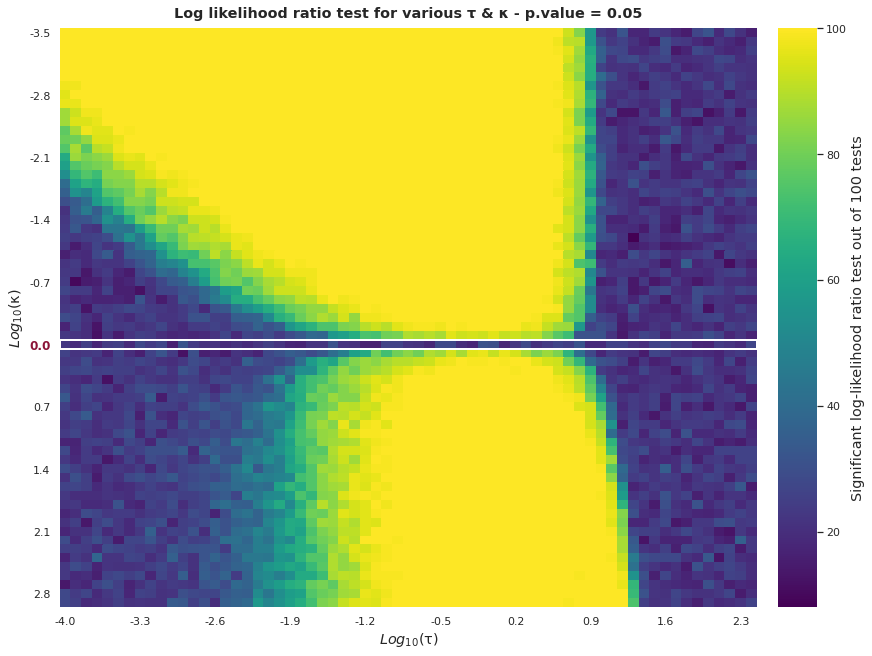

In [7]:
if lang == 'fr':
    title = "Test du rapport de vraisemblance pour différents couples de paramètres τ & κ"
    cbar = "Test du rapport de vraisemblance significatif parmi 100"
else:
    title = "Log likelihood ratio test for various τ & κ - p.value = 0.05"
    cbar = "Significant log-likelihood ratio test out of 100 tests"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="Positive hit"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_lrt.png"
)

> SFS shape

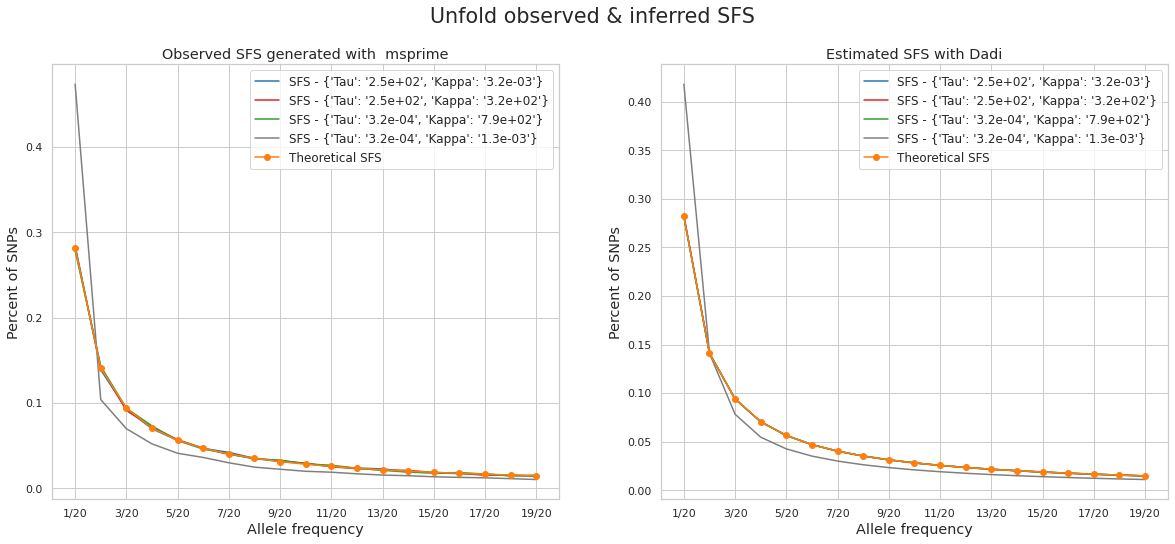

<Figure size 432x288 with 0 Axes>

In [8]:
plot.plot_sfs_inference(
    data=data_all, 
    parameters=[{'Tau': -3.5, 'Kappa': -2.9}, {'Tau': -3.5, 'Kappa': 2.9}, {'Tau': 2.4, 'Kappa': -2.5}, {'Tau': 2.4, 'Kappa': 2.5}], 
    colors=['tab:blue', 'tab:red', 'tab:green', 'tab:gray'],
    suptitle="Unfold observed & inferred SFS"
)

<br>

<div style="font-size: 18px; font-weight: bold">Evaluation of estimated paramaters by dadi</div></br>

> Tau

In [12]:
data_all['Distance'] = dadi.compute_distance(data_all, key='Tau')

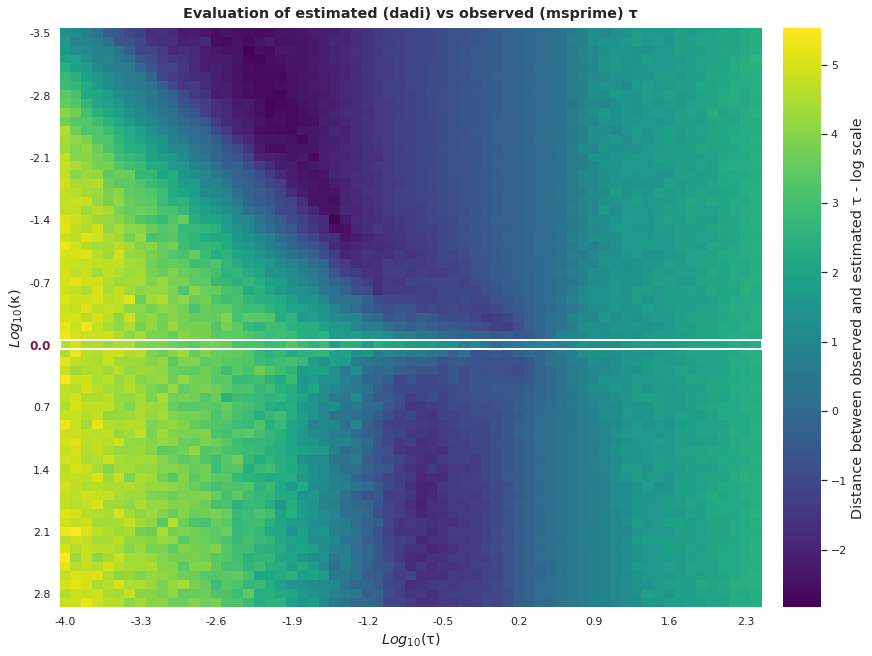

In [14]:
if lang == 'fr':
    title = "Evaluation des τ estimés (dadi) par rapport à ceux observés (msprime)"
    cbar = "Distance entre les τ observés et estimés - échelle logarithmique"
else:
    title = "Evaluation of estimated (dadi) vs observed (msprime) τ"
    cbar = "Distance between observed and estimated τ - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="Distance"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_tau.png"
)

<br>

> Kappa

In [15]:
data_all['Distance'] = dadi.compute_distance(data_all, key='Kappa')

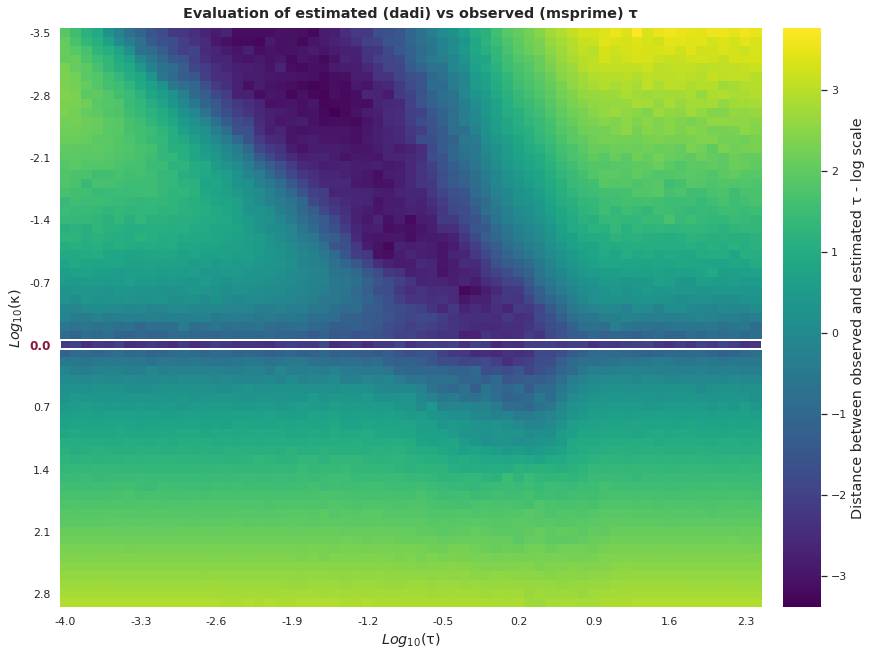

In [16]:
if lang == 'fr':
    title = "Evaluation des τ estimés (dadi) par rapport à ceux observés (msprime)"
    cbar = "Distance entre les τ observés et estimés - échelle logarithmique"
else:
    title = "Evaluation of estimated (dadi) vs observed (msprime) τ"
    cbar = "Distance between observed and estimated τ - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="Distance"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_kappa.png"
)

<br>

> Theta

In [ ]:
#plot_parameters_evaluation_heatmap(data_all, key="Theta")

In [15]:
# data_all['Distance'] = dadi.compute_distance(data_all, key='Theta)

if lang == 'fr':
    title = "Evaluation des θ estimés (dadi) par rapport à ceux observés (msprime)"
    cbar = "Distance entre les θ observés et estimés - échelle logarithmique"
else:
    title = "Evaluation of estimated (dadi) vs observed (msprime) θ"
    cbar = "Distance between observed and estimated θ - log scale"

plot.plot_heatmap(
    data=dadi.data_for_heatmap(data_all, value="Distance"), title=title, cbar=cbar,
    filout="./Figures/Dadi/heatmap_theta.png"
)

<br>

# Fixed kappa - sudden decline & growth model 

## Kappa -3.5, 0. & 2.5 in log sacle, i.e. 3.2e-4, 1.0 & 3.2e2

> Load data

In [ ]:
data_kappa, labels_kappa = \
    f.export_specific_dadi_inference(model='decline', fold=False, fixed_param='kappa', values=[-2.5, 0., 2.5])

> Weighted square distance

In [ ]:
plot.plot_weighted_square_distance(
    data=data_kappa, fixed="Tau", labels=labels_kappa,
    suptitle="Weighted square distance d2 - for various tau and a fixed kappa"
)

> Weighted square distance - observed SFS and theoritical SFS of any constant population

In [ ]:
plt.figure(figsize=(10,10))
sns.set_theme(style='whitegrid')

for dataframe in data_kappa:
    # Data
    df = pd.DataFrame()
    df['Tau'] = dataframe['Parameters'].apply(lambda param: np.log10(param['Tau']))
    df['d2 observed theoritical'] = pd.Series(compute_weighted_square_distance(dataframe)).apply(np.log10)
    
    # Plot
    _ = sns.lineplot(x="Tau", y="d2 observed theoritical", data=df)

> SFS shape

In [ ]:
plot.plot_sfs_inference(
    data=data_kappa[0], 
    parameters=[{'Tau': -3.5, 'Kappa': -3.5}, {'Tau': -3, 'Kappa': -3.5}, {'Tau': -2.5, 'Kappa': -3.5}], 
    colors=['tab:blue', 'tab:red', 'tab:gray'],
    suptitle="Unfold observed & inferred SFS - fixed kappa"
)

> Log-likelihood ratio test

In [ ]:
plot.plot_likelihood(
    data=data_kappa, fixed="Tau", labels=labels_kappa,
    suptitle="Log likelihood ratio test for various tau and a fixed kappa"
)

> Evaluation paramètres estimés

In [ ]:
plot.plot_parameters_evaluation(data=data_kappa[0], key="Tau", fixed=('Kappa', -2.5))

In [ ]:
plot.plot_parameters_evaluation(data=data_kappa[2], key="Tau", fixed=('Kappa', 2.5))

<br>

## Kappa 0.3 & 1 in log scale, i.e. 2 & 10

> Load data

In [ ]:
data_kappa2, labels_kappa2 = \
    f.export_specific_dadi_inference(model='decline', fold=False, fixed_param='kappa', values=[0.3, 1.])

> Weighted square distance

In [ ]:
plot.plot_weighted_square_distance(
    data=data_kappa2, fixed="Tau", labels=labels_kappa2,
    suptitle="Weighted square distance d2 - for various tau and a fixed kappa"
)

> Log-likelihood ratio test

In [ ]:
plot.plot_likelihood(
    data=data_kappa2, fixed="Tau", labels=labels_kappa2,
    suptitle="Log likelihood ratio test for various tau and a fixed kappa"
)

> SFS shape

In [ ]:
plot.plot_sfs_inference(
    data=data_kappa2[0], 
    parameters=[{'Tau': 0., 'Kappa': 0.3}, {'Tau': 0., 'Kappa': 1}], 
    colors=['tab:blue', 'tab:red', 'tab:gray'],
    suptitle="Unfold observed & inferred SFS - fixed kappa"
)

> Evaluation paramètres estimés

In [ ]:
plot.plot_parameters_evaluation(data=data_kappa2[0], key="Tau", fixed=('Kappa', 0.3))

<br>

## Fixed tau - sudden decline & growth model 

### Tau -2.4, 0. & 2.4, i.e. 4e-3, 1. & 251

> Load data

In [ ]:
data_tau, labels_tau = \
    f.export_specific_dadi_inference(model='decline', fold=False, fixed_param='tau', values=[-2.4, 0., 2.4])

> Weighted square distance

In [ ]:
plot.plot_weighted_square_distance(
    data=data_tau, fixed="Kappa", labels=labels_tau,
    suptitle="Weighted square distance for various kappa and a fixed tau")

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style='whitegrid')

for dataframe in data_tau:
    # Data
    df = pd.DataFrame()
    df['Kappa'] = dataframe['Parameters'].apply(lambda param: np.log10(param['Kappa']))
    df['d2 observed theoritical'] = pd.Series(compute_weighted_square_distance(dataframe)).apply(np.log10)
    
    # Plot
    _ = sns.lineplot(x="Kappa", y="d2 observed theoritical", data=df)

> Log-likelihood ratio test

In [ ]:
plot.plot_likelihood(
    data=data_tau, fixed="Kappa", labels=labels_tau,
    suptitle="Log likelihood ratio test for various kappa and a fixed tau")

> SFS shape

In [ ]:
plot.plot_sfs_inference(
    data=data_tau[1], 
    parameters=[{'Tau': 0., 'Kappa': -3.5}, {'Tau': 0., 'Kappa': 0}, {'Tau': 0., 'Kappa': 2.9}], 
    colors=['tab:blue', 'tab:red', 'tab:gray'],
    suptitle="Unfold observed & inferred SFS - fixed tau"
)

> Evaluation paramètres estimés

In [ ]:
plot.plot_parameters_evaluation(data=data_tau[0], key="Kappa", fixed=('Tau', -2.4))